# Matplotlib 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 데이터: London Bike Sharing Dataset
#### 우리나라로 치면 따릉이의 시간별 신규 대여 횟수 
#### 1. 해당 날짜의 기후 변수 - 기온(섭씨), 체감 온도, 습도, 풍속, 날씨 코드, 계절
#### 2. 빨간 날 여부 - 공휴일, 주말

In [2]:
london = pd.read_csv('london_merged.csv')
london.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
london.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [4]:
london["timestamp"] = pd.to_datetime(london["timestamp"])
london.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [5]:
london['cnt'].sum()

19905972

[판다스에서 시계열 자료 처리하는 법](https://m.blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221603462366&proxyReferer=https:%2F%2Fwww.google.com%2F)

In [6]:
london = london.set_index("timestamp")

london["year"] = london.index.year
london["hour"] = london.index.hour
london["day_of_month"] = london.index.day
london["day_of_week"]  = london.index.dayofweek
london["month"] = london.index.month

london.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,0,4,6,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,2,4,6,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,3,4,6,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,4,4,6,1


In [7]:
july = london[london['month']==7]
july.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,,
2015-07-01 00:00:00,413,20.0,20.0,69.0,20.5,1.0,0.0,0.0,1.0,2015,0,1,2,7
2015-07-01 01:00:00,218,20.0,20.0,71.0,17.5,7.0,0.0,0.0,1.0,2015,1,1,2,7
2015-07-01 02:00:00,138,20.0,20.0,71.0,11.0,7.0,0.0,0.0,1.0,2015,2,1,2,7
2015-07-01 03:00:00,74,20.5,20.5,66.5,16.0,1.0,0.0,0.0,1.0,2015,3,1,2,7
2015-07-01 04:00:00,71,20.0,20.0,69.0,12.0,1.0,0.0,0.0,1.0,2015,4,1,2,7


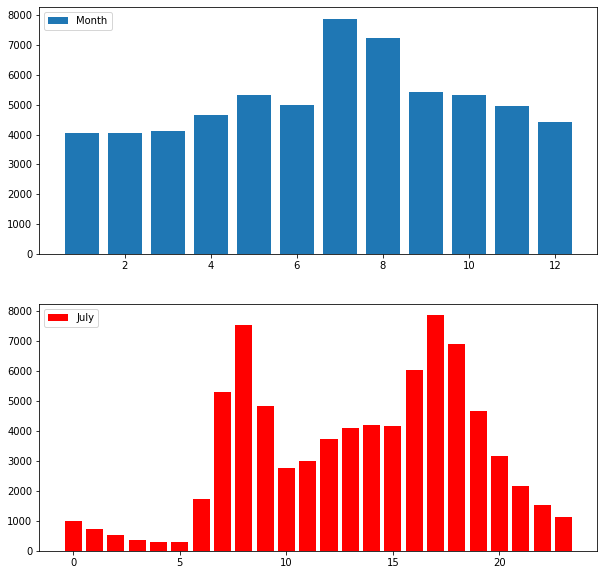

In [8]:
fig, ax = plt.subplots(2,1, sharex=False, sharey=False, figsize = (10,10))
ax[0].bar(london['month'], london['cnt'], label='Month')
ax[1].bar(july['hour'], july['cnt'], color='r', label='July')
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
plt.show()

7, 8월에 가장 대여가 활발하게 이뤄지고, 출근 시간대인 8-9시와 17-19시가 두드러지게 나타남

In [9]:
london[['cnt']] = london[['cnt']].astype('float64')
london.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  float64
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
 9   year          17414 non-null  int64  
 10  hour          17414 non-null  int64  
 11  day_of_month  17414 non-null  int64  
 12  day_of_week   17414 non-null  int64  
 13  month         17414 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 2.0 MB


In [10]:
spring = london[london['season']==0]
summer = london[london['season']==1]
fall = london[london['season']==2]
winter = london[london['season']==3]
clear = london[london['weather_code']==1]
rainy = london[london['weather_code']==7]
spring.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,,
2015-03-01 00:00:00,272.0,11.5,11.5,85.0,28.0,3.0,0.0,1.0,0.0,2015,0,1,6,3
2015-03-01 01:00:00,226.0,11.0,11.0,77.0,29.0,3.0,0.0,1.0,0.0,2015,1,1,6,3
2015-03-01 02:00:00,177.0,10.5,8.5,67.0,37.0,3.0,0.0,1.0,0.0,2015,2,1,6,3
2015-03-01 03:00:00,168.0,9.5,6.0,69.0,29.5,2.0,0.0,1.0,0.0,2015,3,1,6,3
2015-03-01 04:00:00,81.0,9.0,5.5,68.5,26.0,2.0,0.0,1.0,0.0,2015,4,1,6,3


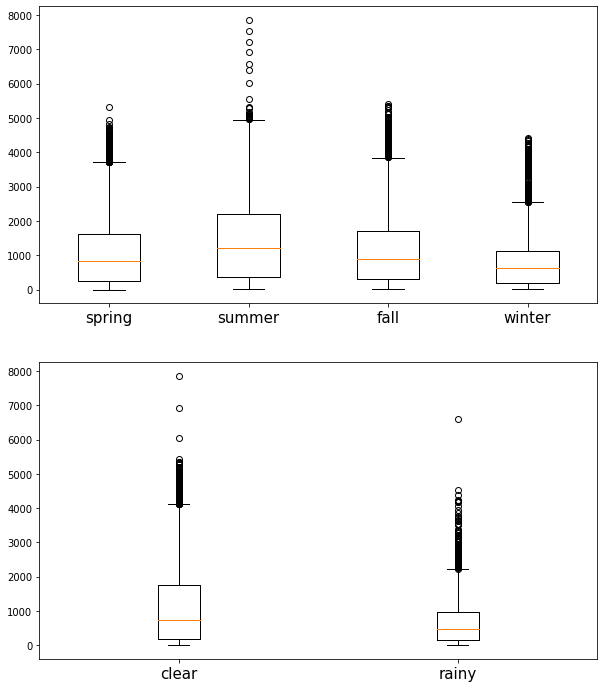

In [11]:
fig, ax = plt.subplots(2,1, figsize=(10,12))
ax[0].boxplot([spring['cnt'], summer['cnt'], fall['cnt'], winter['cnt']])
ax[1].boxplot([clear['cnt'], rainy['cnt']])
ax[0].set_xticklabels(['spring', 'summer', 'fall', 'winter'], fontsize=15)
ax[1].set_xticklabels(['clear', 'rainy'], fontsize=15)

plt.show()

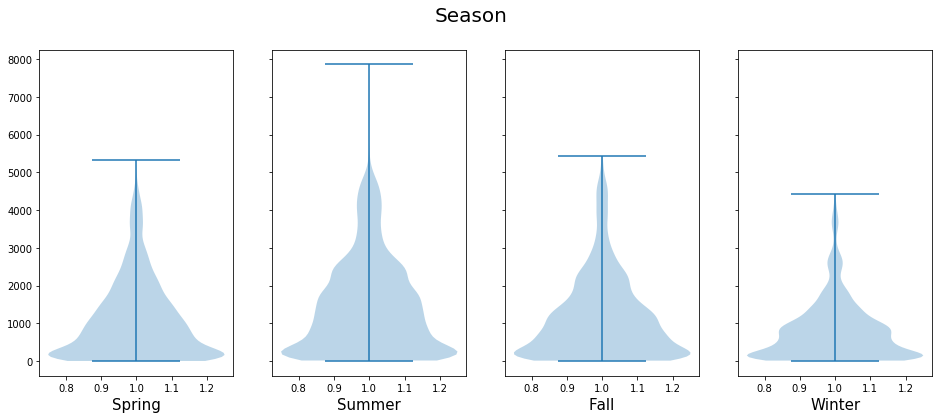

In [12]:
fig, ax = plt.subplots(1,4, sharey=True, figsize=(16,6))
ax[0].violinplot(spring['cnt'])
ax[1].violinplot(summer['cnt'])
ax[2].violinplot(fall['cnt'])
ax[3].violinplot(winter['cnt'])
ax[0].set_xlabel('Spring', fontsize=15)
ax[1].set_xlabel('Summer', fontsize=15)
ax[2].set_xlabel('Fall', fontsize=15)
ax[3].set_xlabel('Winter', fontsize=15)
fig.suptitle('Season', fontsize=20)

plt.show()

In [15]:
y2016 = london[london['year']==2016]
y2016[['is_holiday']] = y2016[['is_holiday']].astype('bool')
y2016[['is_weekend']] = y2016[['is_weekend']].astype('bool')
y2016.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,,
2016-01-01 00:00:00,786.0,6.0,3.5,81.0,13.0,1.0,True,False,3.0,2016,0,1,4,1
2016-01-01 01:00:00,660.0,5.5,3.0,84.0,11.0,1.0,True,False,3.0,2016,1,1,4,1
2016-01-01 02:00:00,387.0,5.0,2.5,84.0,10.0,1.0,True,False,3.0,2016,2,1,4,1
2016-01-01 03:00:00,294.0,5.0,4.5,81.0,5.0,1.0,True,False,3.0,2016,3,1,4,1
2016-01-01 04:00:00,219.0,5.0,4.0,76.0,5.5,1.0,True,False,3.0,2016,4,1,4,1


In [16]:
red = y2016[(y2016['is_holiday']==True) | (y2016['is_weekend']==True)]
weekdays = y2016[(y2016['is_holiday']==False) & (y2016['is_weekend']==False)]
weekdays.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,,
2016-01-04 00:00:00,81.0,8.0,6.0,87.0,10.0,1.0,False,False,3.0,2016,0,4,0,1
2016-01-04 01:00:00,59.0,8.0,6.0,84.5,13.0,1.0,False,False,3.0,2016,1,4,0,1
2016-01-04 02:00:00,34.0,8.0,6.0,82.0,11.0,1.0,False,False,3.0,2016,2,4,0,1
2016-01-04 03:00:00,25.0,8.0,6.0,82.0,12.0,2.0,False,False,3.0,2016,3,4,0,1
2016-01-04 04:00:00,37.0,8.0,6.0,82.0,10.0,2.0,False,False,3.0,2016,4,4,0,1


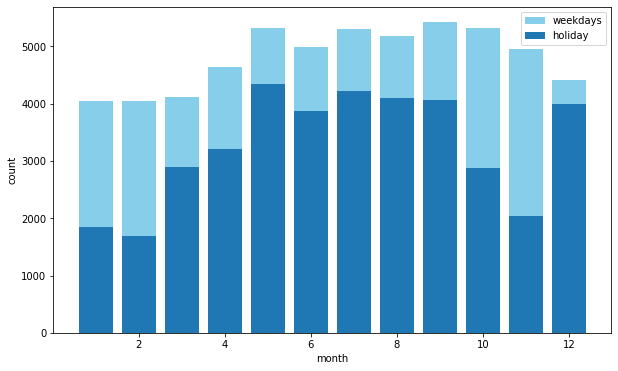

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(weekdays['month'], weekdays['cnt'], label='weekdays', color='skyblue')
ax.bar(red['month'], red['cnt'], label='holiday')
ax.set_xlabel('month')
ax.set_ylabel('count')
ax.legend(loc='upper right')
plt.show()

In [18]:
import seaborn as sns

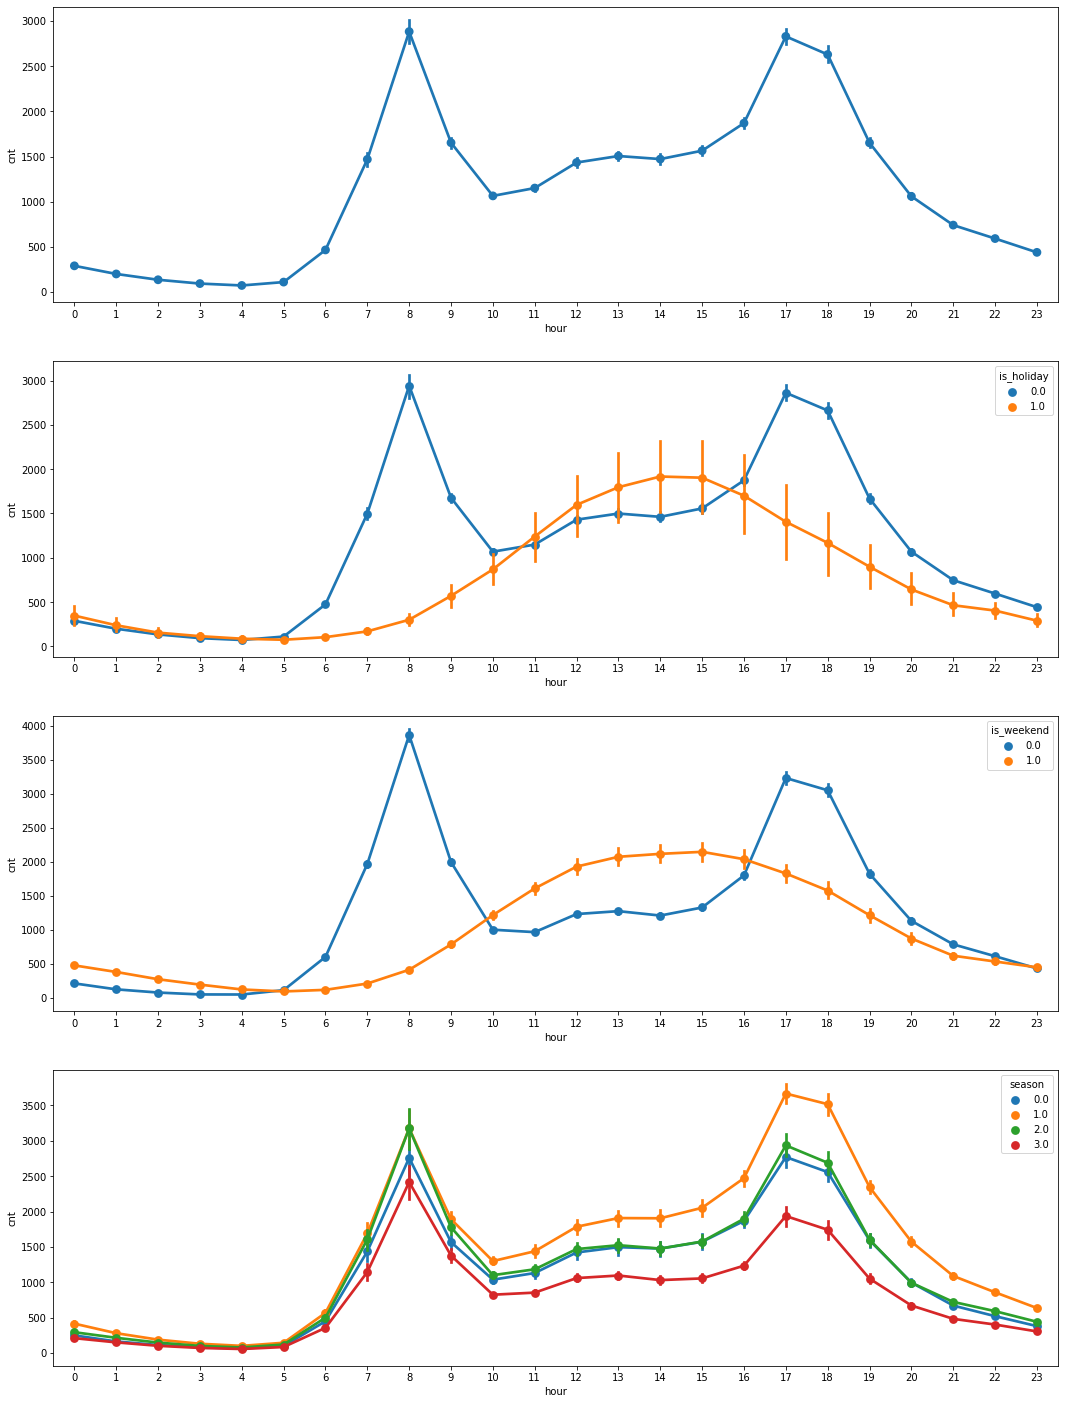

In [19]:
fig,(ax1, ax2, ax3, ax4)= plt.subplots(nrows=4)
fig.set_size_inches(18,25)

sns.pointplot(data=london, x='hour', y='cnt', ax=ax1)
sns.pointplot(data=london, x='hour', y='cnt', hue='is_holiday', ax=ax2)
sns.pointplot(data=london, x='hour', y='cnt', hue='is_weekend', ax=ax3)
sns.pointplot(data=london, x='hour', y='cnt', hue='season', ax=ax4)